# Loi de Benford et Protéome humain
Ce script à pour but de vérifier si le protéome humain suit la loi de Benford.
## Récupération des données

In [45]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, ks_2samp, chi2_contingency, distributions
import random

In [27]:
data = pd.read_csv("uniprot-proteome_UP000005640_reviewed_yes.tab", sep = "\t", index_col=0)
data.head()

,Entry name,Status,Protein names,Gene names,Organism,Length
Entry,,,,,,
O95825,QORL1_HUMAN,reviewed,Quinone oxidoreductase-like protein 1 (EC 1.-....,CRYZL1 4P11,Homo sapiens (Human),349
Q9Y2J0,RP3A_HUMAN,reviewed,Rabphilin-3A (Exophilin-1),RPH3A KIAA0985,Homo sapiens (Human),694
Q13905,RPGF1_HUMAN,reviewed,Rap guanine nucleotide exchange factor 1 (CRK ...,RAPGEF1 GRF2,Homo sapiens (Human),1077
Q5TD94,RSH4A_HUMAN,reviewed,Radial spoke head protein 4 homolog A (Radial ...,RSPH4A RSHL3,Homo sapiens (Human),716
Q9HA92,RSAD1_HUMAN,reviewed,Radical S-adenosyl methionine domain-containin...,RSAD1,Homo sapiens (Human),442


In [28]:
data.describe()

,Length
count,20379.000000
mean,557.467049
std,596.808822
min,2.000000
25%,249.500000
50%,415.000000
75%,670.000000
max,34350.000000


## Distribution de la longeur des protéines du protéome humain :

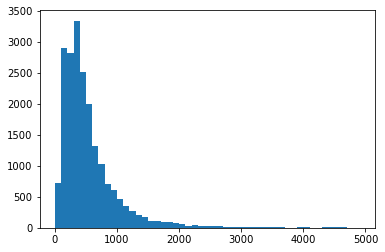

In [29]:
plt.hist(data["Length"], bins=range(0,5000,100));

In [30]:
data[data["Length"] > 5000].shape

(33, 6)

### First digit des protéines :

In [31]:
first_digit = np.zeros(9, dtype=int)
for x in data["Length"]:
    first = int(str(x)[0])
    if first == 0:
        continue
    first_digit[first-1] += 1
        
print(first_digit)
print(sum(first_digit))

[4878 3145 3432 2588 2088 1407 1174  849  818]
20379


### Normalisation :

In [32]:
first_digit_norm = np.array(first_digit / sum(first_digit))

print(first_digit_norm)
print(sum(first_digit_norm))
print(first_digit)

[0.23936405 0.15432553 0.16840866 0.12699347 0.10245841 0.06904166
 0.05760832 0.04166053 0.04013936]
1.0
[4878 3145 3432 2588 2088 1407 1174  849  818]


## Loi de Benford : 

In [33]:
freq_benford = np.zeros(9, dtype=float)
for i in range(9):
    freq_benford[i] = (math.log((1+(1/(i+1))), 10))
print(freq_benford)
sum(freq_benford)

[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


0.9999999999999999

### Distribution de la loi de Benford :

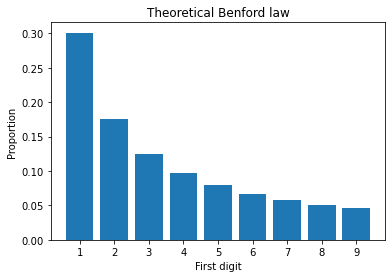

In [34]:
plt.bar(range(1,10), freq_benford)
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.title("Theoretical Benford law")
plt.xticks(range(1, 10));

## Distribution du  first digit de chaque protéines du protéome humain :

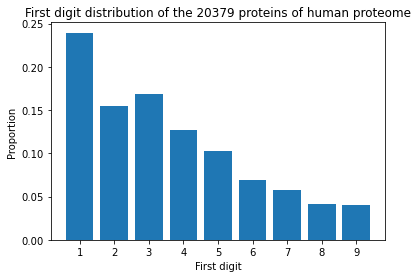

In [35]:
plt.bar(range(1, 10), first_digit_norm)
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.title(f"First digit distribution of the {data.shape[0]} proteins of human proteome")
plt.xticks(range(1, 10));

### Superposition des deux distribution :

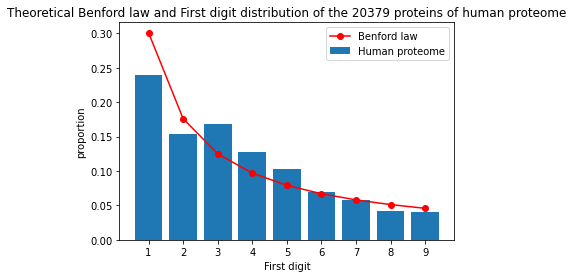

In [36]:
plt.plot(range(1,10), freq_benford, marker="o", color="red")
plt.bar(range(1,10), first_digit_norm)
plt.xlabel("First digit")
plt.ylabel("proportion")
plt.title(f"Theoretical Benford law and First digit distribution of the {data.shape[0]} proteins of human proteome")
plt.xticks(range(1, 10))
plt.legend(labels = ("Benford law", "Human proteome"));

## Test de conformité à une loi théorique:
V.A. : nombre de first digit  

Hopothèse :  
    - H0 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain suit la loi de Benford.  
    - H1 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain ne suit pas la loi de Benford.  
    
Conditionde validité : les effectifs calculés > 5  

Règle de décision (test $\chi²$):  
    -Si, $\chi²_{cal} > \chi²_{\alpha, (k-1)ddl}$, le test est significatif à $\alpha$% et on rejette H0.  
 
## détermination de $F_{theo}$ et $F_{obs}$# Test de conformité à une loi théorique:
V.A. : nombre de first digit  

Hopothèse :  
    - H0 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain suit la loi de Benford.  
    - H1 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain ne suit pas la loi de Benford.  
    
Conditionde validité : les effectifs calculés > 5  

Règle de décision (test $\chi²$):  
    -Si, $\chi²_{cal} > \chi²_{\alpha, (k-1)ddl}$, le test est significatif à $\alpha$% et on rejette H0.  
 
## détermination de $F_{theo}$ et $F_{obs}$

In [37]:
first_digit_theo = np.array(freq_benford * data.shape[0])
print(f"La distribution théorique des first digits est : {first_digit_theo}\n")
print(f"La distribution observé des first digits est : {first_digit}\n")

La distribution théorique des first digits est : [6134.69028164 3588.5637683  2546.12651334 1974.92915509 1613.6346132
 1364.30862588 1181.81788746 1042.43725496  932.49190014]

La distribution observé des first digits est : [4878 3145 3432 2588 2088 1407 1174  849  818]



In [38]:
# Version avec dictionnaire
# dictionnaire de la distribution théorique
"""
first_digit_theo = {}
for key in first_digit:
    first_digit_theo[key] = freq_benford[key] * data.shape[0]

F_theo = [(freq_benford[key]*data.shape[0])/100 for key in sorted(freq_benford)]
print(f"Le dictionnaire de la distribution théorique des first digits est : {first_digit_theo}\n")
print(f"La liste triées par ordre croissant des first digits des valeurs théoriques est : {F_theo}\n")

F_obs = [ first_digit[key] for key in sorted(first_digit) ]
print(f"Le dictionnaire de la distribution observé des first digits est : {first_digit}\n")
print(f"La liste triées par ordre croissant des first digits des valeurs observés est : {F_obs}\n")
""";

## Test statistique de comparaison d'une distribution par rapport une une distribution de référence
Le test à réaliser est un test du $\chi^2$
### test du test du $\chi^2$ sur les fréquence

In [ ]:
donnéeschi2 = chisquare([ first_digit_norm[key] for key in sorted(first_digit_norm) ], [ freq_benford[key] for key in sorted(freq_benford) ])
print(chi2)
print(f"\nLa p-value est de  : {chi2[1]}\n")

Le test du $\chi^2$ sur les fréquence donne une p-value > 0.05, on ne rejette donc pas l'hypothèse $H_0$. Néanmoins, ce les condition de validité du test ne sont pas validé. En effet le test du $\chi^2$ ce réalise sur des distribution et non sur des fréquence. Ici, on obtient des valeurs théorique < 5, donc le test ne peut être réalisé. Il faut donc réaliser le test sur la distribution des $1^{er}$ digits.

### test du $\chi^2$ sur les distribution observé et théorique

In [21]:
F_theo = np.array(first_digit_theo)
F_obs = np.array(first_digit)
print(F_obs, F_theo)

[4878 3145 3432 2588 2088 1407 1174  849  818] [6134.69028164 3588.5637683  2546.12651334 1974.92915509 1613.6346132
 1364.30862588 1181.81788746 1042.43725496  932.49190014]


In [22]:
chi2 = chisquare(F_obs, f_exp = F_theo)
print(chi2)
print(f"\nLa p-value est de  : {chi2[1]}\n")

Power_divergenceResult(statistic=1001.5852644935921, pvalue=6.791254553772907e-211)

La p-value est de  : 6.791254553772907e-211



## Test exact de fisher

In [23]:
fish = np.array([[F_obs], [F_theo]])
print(fish)

[[[4878.         3145.         3432.         2588.         2088.
   1407.         1174.          849.          818.        ]]

 [[6134.69028164 3588.5637683  2546.12651334 1974.92915509 1613.6346132
   1364.30862588 1181.81788746 1042.43725496  932.49190014]]]


In [24]:
chi2_contingency(fish)

(475.01408436665764,
 1.6083386662045773e-97,
 8,
 array([[[5506.34514082, 3366.78188415, 2989.06325667, 2281.46457755,
          1850.8173066 , 1385.65431294, 1177.90894373,  945.71862748,
           875.24595007]],
 
        [[5506.34514082, 3366.78188415, 2989.06325667, 2281.46457755,
          1850.8173066 , 1385.65431294, 1177.90894373,  945.71862748,
           875.24595007]]]))

### Résultasts
On obtient une p-value < 0.05, le test est donc significatif, on rejette l'hypothèse $H_0$ au rique $\alpha$ de 5%. La distribition des $1^{er}$ digits de la taille des protéines du protéome Humain ne suit pas la loi de Benford, Pour un rique $\alpha$ de 5%.

# Test de Kolmogorov-Smirnof
### préparation pour le test KS

In [ ]:
KS_obs = []
for i in range(1, 10):
    KS_obs += [i]*int(first_digit_norm[i]*100)
    
KS_theo = []
for i in range(1, 10):
    KS_theo += [i]*int(freq_benford[i]*100)
print(KS_obs)
print(KS_theo)

In [ ]:
random.shuffle(KS_obs)
random.shuffle(KS_theo)
print(KS_obs)
print(KS_theo)

In [ ]:
ks_2samp(KS_obs, KS_theo)

## Test KS sur la distribution

In [ ]:
KS_obs = []
for i in range(1, 10):
    KS_obs += [i]*int(first_digit[i])
KS_theo = []
for i in range(1, 10):
    KS_theo += [i]*int(freq_benford[i]*data.shape[0])
print(len(KS_obs))
print(len(KS_theo))

In [ ]:
random.shuffle(KS_obs)
random.shuffle(KS_theo)
ks_2samp(KS_obs, KS_theo)

# discussion des résultats obtenus précédement

Les différent tests statistique testés plus jusqu'ici ne fonctionne pas dans le cas des grand échantillons (environ > 1000) ou ne sont pas applicables dans notre situation. c'est pour cette raison que l'on développe une procédure ressemblant à un bootstrap récupérant le $\chi^2$ calculés et renvoyant la moyennes des $\chi^2$ calculé durant la procédure. La p-value de ce $\chi^2$ est calculé par la suite.

# procédure "bootstrap"
## Fonction First digit

In [41]:
def First_digit(np_array):
    fd = np.zeros(9, dtype=int)
    for x in range(len(np_array)):
        first = int(str(np_array[x])[0])
        fd[first-1] += 1
    return fd

## Fonction de moyenne des $\chi^2$

In [42]:
def meanChi2(data, nb_val, nb_loop):
    sumChi2 = np.zeros(nb_loop, dtype=float)
    f_theo = np.array(freq_benford * nb_val)
    for i in range(nb_loop):
        ech = np.random.choice(data, size=nb_val, replace=False)
        f_obs = First_digit(ech)
        sumChi2[i] = chisquare(f_obs, f_theo)[0]
    return (sum(sumChi2) / nb_loop)

## Fonction principale de la procédure "bootstrap"

In [43]:
def bootstrap_Benford(data, nb_val, nb_loop):
    k = len(freq_benford+1)
    mean_chi2 = meanChi2(data, nb_val, nb_loop)
    p_val = distributions.chi2.sf(mean_chi2, k - 1)
    return p_val

In [48]:
bootstrap_Benford(data["Length"], 1000, 1000)

1.6785648085844228e-09

In [49]:
bootstrap_Benford(data["Length"], 1000, 1000)

2.0554857629102295e-09

## conclusion

La procédure mise en place ("bootstrap") permet de montrer, por un rique alpha de 5%, que les données expérimentale d'abondances de protéines ne suivent pas ici la loi de Benford. Puisque la p-value obtenu est inférieur à 5%, on rejette l'hypothése $H_0$, donc la distribution théorique ne suit pas la loi Beford.